In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Prepare the data to model this regression (including data cleaning if necessary)

$$ Propertycrime = alpha + Population + Population^2 + Murder + Robbery $$

Population is already set, but the last three features will need to be created

In [85]:
df = pd.read_csv('nylawenf.csv')

In [86]:
df.head(10)

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,"4,089",5,0,NaN,0,3,2,46,10,36,0,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 13 columns):
Table 8        355 non-null object
Unnamed: 1     349 non-null object
Unnamed: 2     349 non-null object
Unnamed: 3     349 non-null object
Unnamed: 4     1 non-null object
Unnamed: 5     350 non-null object
Unnamed: 6     349 non-null object
Unnamed: 7     349 non-null object
Unnamed: 8     349 non-null object
Unnamed: 9     349 non-null object
Unnamed: 10    349 non-null object
Unnamed: 11    349 non-null object
Unnamed: 12    188 non-null object
dtypes: object(13)
memory usage: 36.1+ KB


In [88]:
dfnew = df.iloc[4:352, [0, 1, 3, 6]]
dfnew.head()

,Table 8,Unnamed: 1,Unnamed: 3,Unnamed: 6
4,Adams Village,"1,861",0,0
5,Addison Town and Village,"2,577",0,0
6,Akron Village,"2,846",0,0
7,Albany,"97,956",8,227
8,Albion Village,"6,388",0,4


In [89]:
dfnew.columns = ['city', 'population', 'murder', 'robbery']
dfnew.head()

,city,population,murder,robbery
4,Adams Village,"1,861",0,0
5,Addison Town and Village,"2,577",0,0
6,Akron Village,"2,846",0,0
7,Albany,"97,956",8,227
8,Albion Village,"6,388",0,4


In [90]:
dfnew = dfnew.reset_index(drop=True)
dfnew.head()

,city,population,murder,robbery
0,Adams Village,"1,861",0,0
1,Addison Town and Village,"2,577",0,0
2,Akron Village,"2,846",0,0
3,Albany,"97,956",8,227
4,Albion Village,"6,388",0,4


In [91]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 4 columns):
city          348 non-null object
population    348 non-null object
murder        348 non-null object
robbery       348 non-null object
dtypes: object(4)
memory usage: 11.0+ KB


In [92]:
dfnew['murder'] = dfnew['murder'].astype(int)

In [93]:
dfnew['population'] = dfnew['population'].str.replace('\'', '')
dfnew['population'] = dfnew['population'].str.replace(',', '')

In [94]:
dfnew['population'] = dfnew['population'].astype(int)

In [95]:
dfnew['robbery'] = dfnew['robbery'].str.replace('\'', '')
dfnew['robbery'] = dfnew['robbery'].str.replace(',', '')
dfnew['robbery'] = dfnew['robbery'].astype(int)

In [134]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
city          348 non-null object
population    348 non-null int64
murder        348 non-null int64
robbery       348 non-null int64
squaredpop    348 non-null int64
murdertf      348 non-null int64
robberytf     348 non-null int64
dtypes: int64(6), object(1)
memory usage: 19.1+ KB


In [97]:
dfnew.describe()

,population,murder,robbery
count,3.480000e+02,348.000000,348.000000
mean,4.003763e+04,1.566092,72.902299
std,4.500374e+05,18.303673,1031.032873
min,5.260000e+02,0.000000,0.000000
25%,3.003000e+03,0.000000,0.000000
50%,7.233500e+03,0.000000,1.000000
75%,1.842750e+04,0.000000,5.000000
max,8.396126e+06,335.000000,19170.000000


In [99]:
print(dfnew.population.max())

8396126


In [110]:
dfnew['squaredpop'] = dfnew.population.apply(lambda x: x**2)

In [111]:
dfnew.head()

,city,population,murder,robbery,squaredpop
0,Adams Village,1861,0,0,3463321
1,Addison Town and Village,2577,0,0,6640929
2,Akron Village,2846,0,0,8099716
3,Albany,97956,8,227,9595377936
4,Albion Village,6388,0,4,40806544


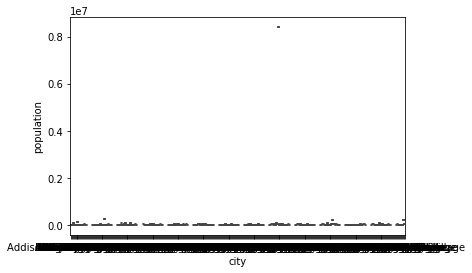

In [112]:
sns.boxplot(x='city', y='population', data=dfnew)
plt.show()

In [114]:
dfnew.sort_values(by='population', ascending=False).head()

,city,population,murder,robbery,squaredpop
216,New York,8396126,335,19170,70494931807876
35,Buffalo,258789,47,1322,66971746521
272,Rochester,210562,42,918,44336355844
346,Yonkers,199134,6,390,39654349956
310,Syracuse,143834,21,400,20688219556


New York is certainly an outlier. May consider dropping it.

In [129]:
def truefalse(x):
    if x == 0:
        return 0
    else:
        return 1

In [130]:
dfnew['murdertf'] = dfnew.murder.apply(truefalse)

In [131]:
dfnew['robberytf'] = dfnew.robbery.apply(truefalse)

In [132]:
dfnew.head()

,city,population,murder,robbery,squaredpop,murdertf,robberytf
0,Adams Village,1861,0,0,3463321,0,0
1,Addison Town and Village,2577,0,0,6640929,0,0
2,Akron Village,2846,0,0,8099716,0,0
3,Albany,97956,8,227,9595377936,1,1
4,Albion Village,6388,0,4,40806544,0,1
